In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test3_modify.csv')

In [3]:
label = 'Churn_num'
features = ['SeniorCitizen', 'TotalCharges', 'tenure_scaled',
       'MonthlyCharges_scaled', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

X, Y = df[features], df[label]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          7043 non-null   int64  
 1   TotalCharges           7043 non-null   float64
 2   Churn_num              7043 non-null   int64  
 3   tenure_scaled          7043 non-null   float64
 4   MonthlyCharges_scaled  7043 non-null   float64
 5   Partner_num            7043 non-null   int64  
 6   Dependents_num         7043 non-null   int64  
 7   PhoneService_num       7043 non-null   int64  
 8   PaperlessBilling_num   7043 non-null   int64  
 9   InternetSpeed          7043 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 550.4 KB


#### 군집 알고리즘
- 유사한 row를 그룹으로 묶는다

In [4]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.labels_

array([2, 0, 2, ..., 2, 2, 1])

In [7]:
df['cluster'] = kmeans.labels_

In [8]:
df.head()

,SeniorCitizen,TotalCharges,Churn_num,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,0,29.85,0,0.013889,-1.160323,1,0,0,1,0.5,2
1,0,1889.50,0,0.472222,-0.259629,0,0,1,0,0.5,0
2,0,108.15,1,0.027778,-0.362660,0,0,1,1,0.5,2
3,0,1840.75,0,0.625000,-0.746535,0,0,0,0,0.5,0
4,0,151.65,1,0.027778,0.197365,0,0,1,1,1.0,2


In [9]:
import numpy as np

In [11]:
df.groupby('cluster').agg({label:np.mean})

,Churn_num
cluster,
0,0.225750
1,0.131365
2,0.361783
3,0.180328


In [12]:
np.mean(df[label])

# 전체 고객 중 26% 정도 이탈하는데,
# 어떤 그룹은 평균 대비 2배 정도 이탈률이 높거나 낮다.

0.2653698707936959

In [13]:
# 이탈률이 가장 높은 그룹(2)과 낮은 그룹(1)의 특징을 확인

df.describe()

,SeniorCitizen,TotalCharges,Churn_num,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,2279.734304,0.265370,0.449599,-1.500401e-15,0.483033,0.299588,0.903166,0.592219,0.611458,1.550760
std,0.368612,2266.794470,0.441561,0.341104,1.000071e+00,0.499748,0.458110,0.295752,0.491457,0.389438,1.037811
min,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,398.550000,0.000000,0.125000,-9.725399e-01,0.000000,0.000000,1.000000,0.000000,0.500000,1.000000
50%,0.000000,1394.550000,0.000000,0.402778,1.857327e-01,0.000000,0.000000,1.000000,1.000000,0.500000,2.000000
75%,0.000000,3786.600000,1.000000,0.763889,8.338335e-01,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,8684.800000,1.000000,1.000000,1.794352e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [19]:
df.loc[df['cluster'] == 1][features].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.217923
1,TotalCharges,6643.253921
2,tenure_scaled,0.920344
3,MonthlyCharges_scaled,1.180668
4,Partner_num,0.762729
5,Dependents_num,0.339104
6,PhoneService_num,1.000000
7,PaperlessBilling_num,0.714868
8,InternetSpeed,0.905295


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='mean', ylabel='index'>

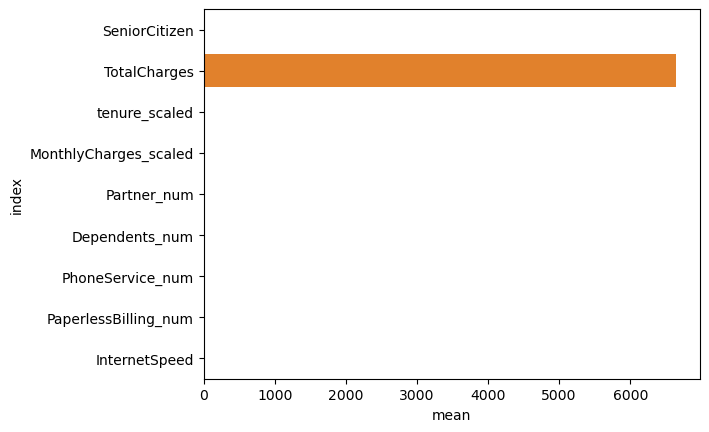

In [20]:
for_plot = df.loc[df['cluster'] == 1][features].describe().T['mean'].reset_index()
sns.barplot(data=for_plot, x='mean', y='index')

In [21]:
features

['SeniorCitizen',
 'TotalCharges',
 'tenure_scaled',
 'MonthlyCharges_scaled',
 'Partner_num',
 'Dependents_num',
 'PhoneService_num',
 'PaperlessBilling_num',
 'InternetSpeed']

In [22]:
features = ['SeniorCitizen',
 'tenure_scaled',
 'MonthlyCharges_scaled',
 'Partner_num',
 'Dependents_num',
 'PhoneService_num',
 'PaperlessBilling_num',
 'InternetSpeed']

<AxesSubplot:xlabel='mean', ylabel='index'>

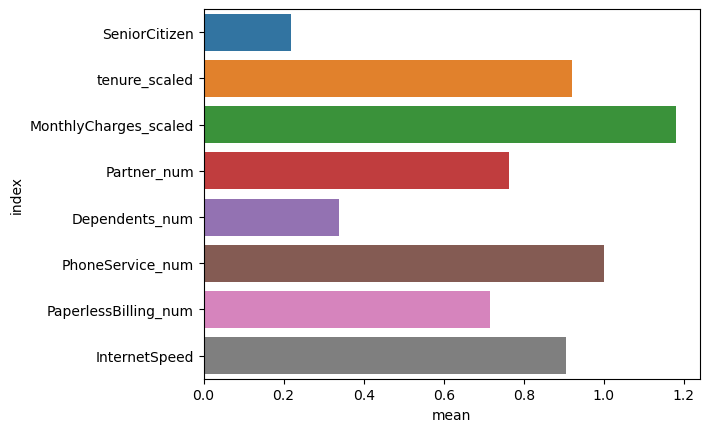

In [26]:
for_plot = df.loc[df['cluster'] == 1][features].describe().T['mean'].reset_index()
sns.barplot(data=for_plot, x='mean', y='index')

<AxesSubplot:xlabel='mean', ylabel='index'>

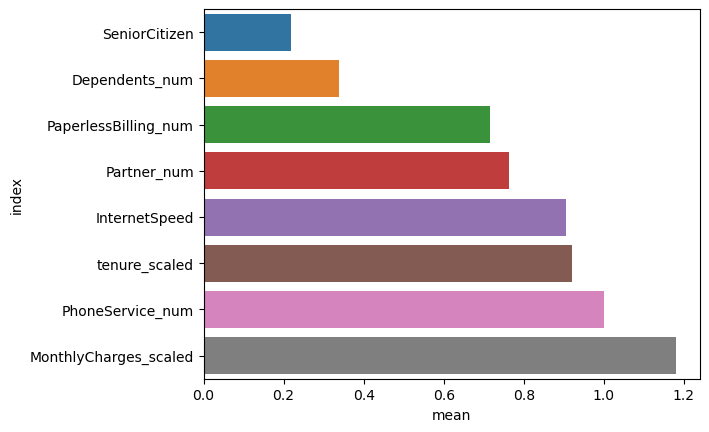

In [27]:
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index')

# SeniorCitizen, Dependents_num 만 낮은 수치

In [28]:
df.loc[df['cluster'] == 2][features].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.120382
1,tenure_scaled,0.162646
2,MonthlyCharges_scaled,-0.551715
3,Partner_num,0.320382
4,Dependents_num,0.267516
5,PhoneService_num,0.891401
6,PaperlessBilling_num,0.526433
7,InternetSpeed,0.467675


<AxesSubplot:xlabel='mean', ylabel='index'>

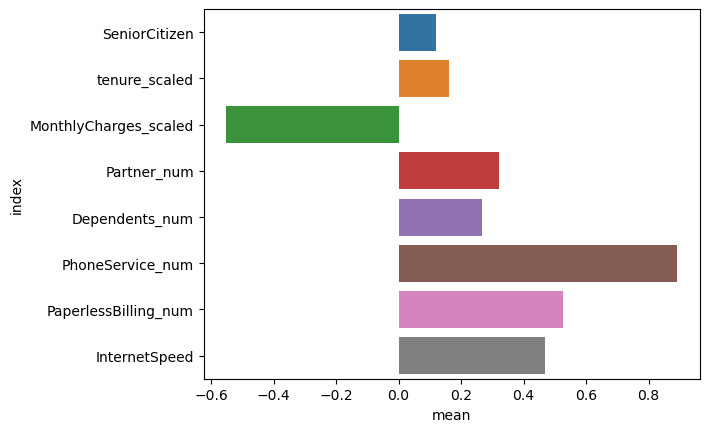

In [29]:
for_plot = df.loc[df['cluster'] == 2][features].describe().T['mean'].reset_index()
sns.barplot(data=for_plot, x='mean', y='index')

<AxesSubplot:xlabel='mean', ylabel='index'>

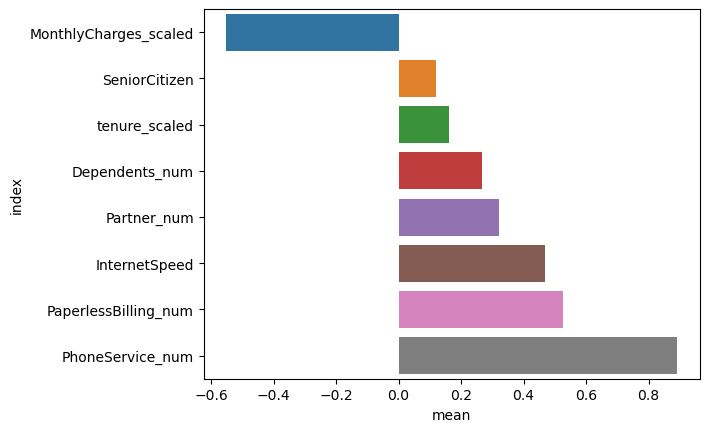

In [30]:
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index')

# PhoneService_num 만 높은 수치

#### 그룹화 할 때, 군집의 개수를 지정하는 방법
- 군집의 개수를 미리 알고있는 경우 - 그대로 사용
- 실루엣 지표 : -1 ~ 1 사이의 범위
- scree plot, elbow method

In [31]:
from sklearn.metrics import silhouette_score as sil

In [34]:
model = KMeans(n_clusters=3)
model.fit(df[features])

KMeans(n_clusters=3)

In [35]:
sil_score = sil(df[features], model.labels_)
sil_score

0.26924896878322424

In [36]:
model = KMeans(n_clusters=4)
model.fit(df[features])

sil_score = sil(df[features], model.labels_)
# model.inertia_ --> elbow score
sil_score

0.2402894374815951

In [39]:
score_list = []

for i in range(10):
    i = i + 2
    model = KMeans(n_clusters=i)
    model.fit(df[features])

    sil_score = sil(df[features], model.labels_)
    elbow_score = model.inertia_
    
    score_list.append({'num_cluster':i, 'sil':sil_score, 'elbow':elbow_score})

score_df = pd.DataFrame(score_list)

In [40]:
score_df

,num_cluster,sil,elbow
0,2,0.357751,8937.281253
1,3,0.269249,7657.455952
2,4,0.240285,6686.897461
3,5,0.246856,6077.055985
4,6,0.254572,5601.856381
5,7,0.261870,5089.508309
6,8,0.269550,4675.440257
7,9,0.270321,4396.298579
8,10,0.277626,4169.561624
9,11,0.296336,3923.770979


<AxesSubplot:xlabel='num_cluster', ylabel='elbow'>

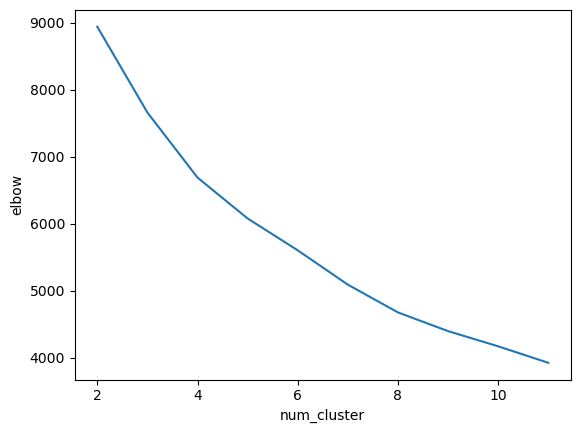

In [42]:
sns.lineplot(data=score_df, x='num_cluster', y='elbow')

#### 차원 축소 (Dimensionality Reduction)
- 차원 = feature
- ex) feature 1개 = 1차원, feature 2개 = 2차원, ...
- 차원 축소 알고리즘 : 주성분분석 (PCA)

In [43]:
from sklearn.decomposition import PCA

In [44]:
len(features)

8

In [45]:
model = PCA(n_components=2)
pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])

# 원래 feature가 3개 였는데, 2개로 변환함 (차원 축소)

,PC1,PC2
0,-1.077752,-0.018679
1,-0.399133,-0.428201
2,-0.330653,-0.695921
3,-0.895657,-0.425295
4,0.344060,-0.706090
...,...,...
7038,0.613580,0.761369
7039,1.385085,0.932505
7040,-1.135765,0.611955
7041,0.592569,-0.054337


In [46]:
model.components_

array([[ 0.08937615,  0.07478645,  0.91108996,  0.04501624, -0.06082992,
         0.06433438,  0.19558914,  0.32895777],
       [-0.094996  ,  0.26835343,  0.04664807,  0.73355829,  0.59375   ,
         0.0153793 , -0.14364602, -0.07258531]])

In [47]:
pd.DataFrame(model.components_, columns=features)

# PC1 = (0.089376 * SeniorCitizen) + (0.074786 * tenure_scaled) + ... + (0.328958 * InternetSpeed)
# PC2 = (-0.094996 * SeniorCitizen) + (0.268353 * tenure_scaled) + ... + (-0.072585 * InternetSpeed)

,SeniorCitizen,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
0,0.089376,0.074786,0.911090,0.045016,-0.06083,0.064334,0.195589,0.328958
1,-0.094996,0.268353,0.046648,0.733558,0.59375,0.015379,-0.143646,-0.072585


#### PCA 수학적 설명
- column끼리 공분산을 구해서 공분산 행렬을 구함 ex) df[].cov()
- 고유값, 고유벡터를 정방행렬에서 뽑아낼 수 있음
- 고유값의 크기 순으로 정렬
- 크기가 가장 큰 고유값부터 정렬하면 순서를 갖음
- 고유값과 고유벡터는 한 쌍으로 있음
- 고유벡터 크기가 큰 것부터 작은 것 순서대로 PC1, PC2, ... 으로 이름을 붙임